In [1]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [2]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

In [3]:
INT_df = pd.read_csv(Dataset_directory+"Processed"+os.sep+"INT_df"+".csv")

C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,7,8,10,11,12,13,16,17,18,19,67,69,71,776,778,779,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,806,807,808,809,812,813,815,817,871,872,873) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
INT_df[ INT_df.columns[[5,7,8,10,11,12,13,16,17,18,19,67,69,71,776,778,779,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,806,807,808,809,812,813,815,817,871,872,873]] ]

,TMB_homepage,TMB_original_title,TMB_overview,TMB_poster_path,TMB_production_companies,TMB_production_countries,TMB_release_date,TMB_spoken_languages,TMB_status,TMB_tagline,...,SER_releaseDate,SER_directedBy,SER_starring,SER_genres,SER_director_list,SER_genres_list,SER_starring_list,NUM_date,NUM_title,NUM_link
0,http://toystory.disney.com/toy-story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[3],['US'],1995-10-30,[0],Released,NaN,...,1995-11-19,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...","Adventure,Animation,Children,Comedy,Fantasy",['John Lasseter'],"['Adventure', 'Animation', 'Children', 'Comedy...","['Tim Allen', ' Tom Hanks', ' Don Rickles', ' ...",1995-11-22,Toy Story,/movie/Toy-Story#tab=summary
1,NaN,Jumanji,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[559, 2550, 10201]",['US'],1995-12-15,"[0, 1]",Released,Roll the dice and unleash the excitement!,...,1995-12-15,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...","Adventure,Children,Fantasy",['Joe Johnston'],"['Adventure', 'Children', 'Fantasy']","['Jonathan Hyde', ' Bradley Pierce', ' Robin W...",1995-12-15,Jumanji,/movie/Jumanji#tab=summary
2,NaN,Grumpier Old Men,A family wedding reignites the ancient feud be...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[6194, 19464]",['US'],1995-12-22,[0],Released,Still Yelling. Still Fighting. Still Ready for...,...,1995-01-01,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...","Comedy,Romance",['Howard Deutch'],"['Comedy', 'Romance']","['Jack Lemmon', ' Walter Matthau', ' Ann-Margr...",NaN,NaN,NaN
3,NaN,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[306],['US'],1995-12-22,[0],Released,Friends are the people who let you be yourself...,...,1996-01-15,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...","Comedy,Drama,Romance",['Forest Whitaker'],"['Comedy', 'Drama', 'Romance']","['Angela Bassett', ' Loretta Devine', ' Whitne...",NaN,NaN,NaN
4,NaN,Father of the Bride Part II,Just when George Banks has recovered from his ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[5842, 9195]",['US'],1995-02-10,[0],Released,Just When His World Is Back To Normal... He's ...,...,1995-12-08,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",Comedy,['Charles Shyer'],['Comedy'],"['Steve Martin', ' Martin Short', ' Diane Keat...",NaN,NaN,NaN
5,NaN,Heat,"Obsessive master thief, Neil McCauley leads a ...",/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[508, 675, 6194]",['US'],1995-12-15,"[0, 5]",Released,A Los Angeles Crime Saga,...,1995-01-01,Michael Mann,"Robert De Niro, Al Pacino, Val Kilmer, Jon Voi...","Action,Crime,Thriller",['Michael Mann'],"['Action', 'Crime', 'Thriller']","['Robert De Niro', ' Al Pacino', ' Val Kilmer'...",NaN,NaN,NaN
6,NaN,Sabrina,An ugly duckling having undergone a remarkable...,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[4, 258, 932, 5842, 14941, 55873, 58079]","['DE', 'US']",1995-12-15,"[1, 0]",Released,You are cordially invited to the most surprisi...,...,1995-01-01,Sydney Pollack,"Harrison Ford, Greg Kinnear, Nancy Marchand, J...","Comedy,Romance",['Sydney Pollack'],"['Comedy', 'Romance']","['Harrison Ford', ' Greg Kinnear', ' Nancy Mar...",1995-12-15,Sabrina,/movie/Sabrina#tab=summary
7,NaN,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,[2],['US'],1995-12-22,"[0, 4]",Released,The Original Bad Boys.,...,1995-12-22,Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro, Eric Schw...","Adventure,Children",['Peter Hewitt'],"['Adventure', 'Children']","['Jonathan Taylor Thomas', ' Brad Renfro', ' E...",NaN,NaN,NaN
8,NaN,Sudden Death,International action superstar Jean Claude Van...,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,"[33, 21437, 23770]",['US'],1995-12-22,[0],Released,Terror goes into overtime.,...,1995-12-22,Peter Hyams,"Raymond J. Barry, Powers Boothe, Jean-Claude V...",Action,['Peter Hyams'],['Action

In [10]:
num INT_df["TMB_production_countries"].apply( lambda x:len(x) if pd.notnull(x) else 0 )


In [43]:
[x for x in INT_df.columns if "companies" in x]

['TMB_production_companies',
 'TMB_num_production_companies',
 'TMB_production_companies_American International Pictures (AIP)',
 'TMB_production_companies_BBC Films',
 'TMB_production_companies_British Broadcasting Corporation (BBC)',
 'TMB_production_companies_CJ Entertainment',
 'TMB_production_companies_Canal+',
 'TMB_production_companies_Castle Rock Entertainment',
 'TMB_production_companies_Centre National de la Cinématographie (CNC)',
 'TMB_production_companies_Channel Four Films',
 'TMB_production_companies_Columbia Pictures',
 'TMB_production_companies_Columbia Pictures Corporation',
 'TMB_production_companies_Dimension Films',
 'TMB_production_companies_DreamWorks SKG',
 'TMB_production_companies_Film4',
 'TMB_production_companies_Fox Searchlight Pictures',
 'TMB_production_companies_France 2 Cinéma',
 'TMB_production_companies_Gaumont',
 'TMB_production_companies_Hammer Film Productions',
 'TMB_production_companies_Hollywood Pictures',
 'TMB_production_companies_Lions Gate F

In [40]:
INT_df["TMB_num_production_countries"].value_counts()

1.0     32135
0.0      6279
2.0      4872
3.0      1468
4.0       460
5.0       151
6.0        38
7.0        12
8.0         7
9.0         5
11.0        2
15.0        1
10.0        1
25.0        1
12.0        1
Name: TMB_num_production_countries, dtype: int64

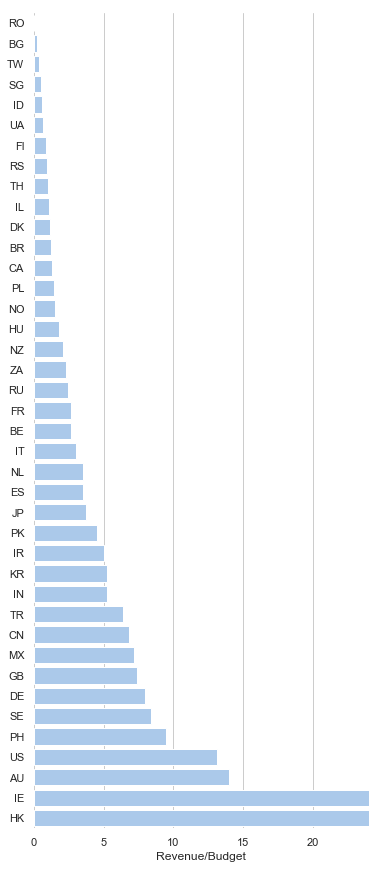

In [47]:
mask = (INT_df["TMB_num_production_countries"]==1.0) & ( INT_df["TMB_revenue_divided_by_budget"].notnull() )

TMB_prod_companies = pd.read_csv(Dataset_directory+"Processed"+os.sep+"TMB_prod_companies"+".csv",index_col="id.1")
TMB_prod_companies.index = TMB_prod_companies["id"]

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

df = INT_df[[ "TMB_revenue_divided_by_budget", "TMB_production_countries"]][mask]
df["TMB_production_countries"] = df["TMB_production_countries"].apply(lambda x: eval(x)[0])
df = df.groupby("TMB_production_countries").mean().reset_index().sort_values(by="TMB_revenue_divided_by_budget",ascending=True)

sns.set_color_codes("pastel")
sns.barplot(x="TMB_revenue_divided_by_budget", y="TMB_production_countries", data=df,
            label="Revenue/Budget", color="b");

# Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Revenue/Budget")
sns.despine(left=True, bottom=True)

In [41]:
INT_df["TMB_num_production_companies"].value_counts()

1.0     16570
0.0     11868
2.0      7960
3.0      4712
4.0      1948
5.0       949
6.0       561
7.0       313
8.0       179
9.0       133
10.0       67
11.0       42
12.0       34
16.0       21
13.0       19
14.0       16
15.0        9
17.0        7
19.0        5
20.0        5
21.0        4
18.0        3
26.0        3
22.0        3
25.0        1
24.0        1
Name: TMB_num_production_companies, dtype: int64

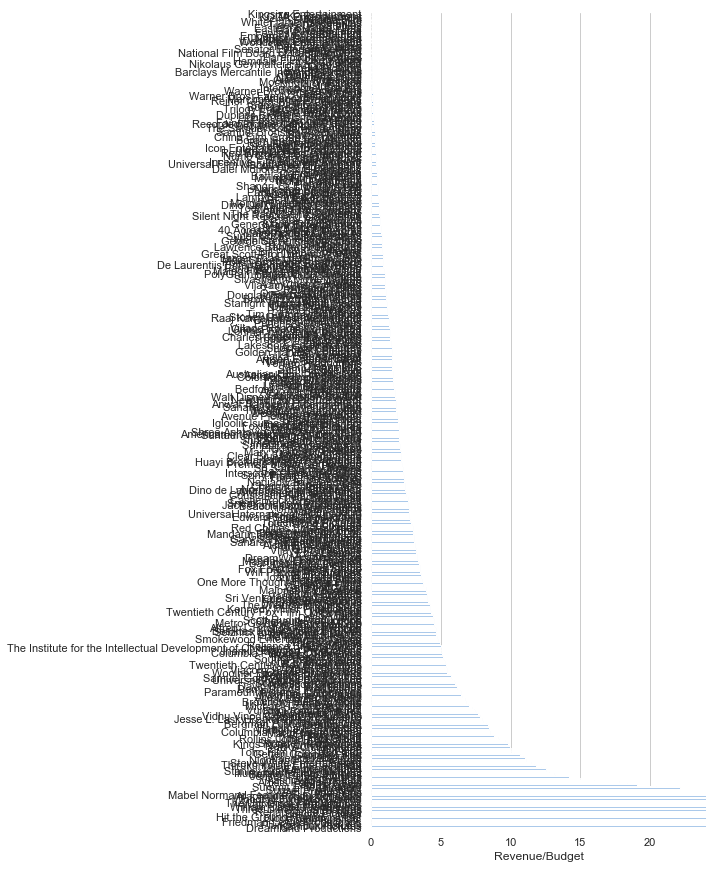

In [53]:
mask = (INT_df["TMB_num_production_companies"]==1.0) & ( INT_df["TMB_revenue_divided_by_budget"].notnull() )

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

df = INT_df[[ "TMB_revenue_divided_by_budget", "TMB_production_companies"]][mask]
df["TMB_production_companies"] = df["TMB_production_companies"].apply(lambda x: eval(x)[0])
df['TMB_production_companies'] = df['TMB_production_companies'].apply(lambda x: TMB_prod_companies.loc[x,"name"])
df = df.groupby("TMB_production_companies").mean().reset_index().sort_values(by="TMB_revenue_divided_by_budget",ascending=True)

sns.set_color_codes("pastel")
sns.barplot(x="TMB_revenue_divided_by_budget", y="TMB_production_companies", data=df,
            label="Revenue/Budget", color="b");

# Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Revenue/Budget")
sns.despine(left=True, bottom=True)

In [79]:
df

,TMB_production_companies,TMB_revenue_divided_by_budget
217,Kingsize Entertainment,0.001170
241,MK2 Productions,0.001289
213,KODA Entertainment,0.001292
255,Medusa Film,0.001407
281,Niama Film,0.002236
494,WhiteFlame Productions,0.002512
468,Variance Films,0.003612
432,Tigers Den Studios,0.005409
1,26 Films,0.005509
120,Eastern Sunrise Films,0.006024


In [ ]:
# Epoch Film Co.	 Birth of a Nation

In [63]:
df[df["TMB_production_companies"]=="The Asylum"]
#1311

,TMB_production_companies,TMB_revenue_divided_by_budget
421,The Asylum,1.0


In [92]:
TMB_prod_companies[TMB_prod_companies["name"]=="Friedman-Lewis Productions"].index

Int64Index([4756], dtype='int64', name='id')

In [93]:
INT_df[INT_df["TMB_production_companies"].apply(lambda x: 4756 in eval(x) if pd.notnull(x) else False)][["TMB_title"]+['TMB_budget',
 'TMB_revenue',
 'NUM_production_budget',
 'NUM_domestic_gross',
 'NUM_worldwide_gross','TMB_release_year']]

,TMB_title,TMB_budget,TMB_revenue,NUM_production_budget,NUM_domestic_gross,NUM_worldwide_gross,TMB_release_year
3224,Blood Feast,24500.0,4000000.0,NaN,NaN,NaN,1963.0
3231,Two Thousand Maniacs!,65000.0,NaN,NaN,NaN,NaN,1964.0


In [77]:
[x for x in INT_df.columns if ("revenue" in x) or ("gross" in x)]

['TMB_revenue',
 'TMB_revenue_divided_by_budget',
 'TMB_revenue_normalised',
 'TMB_revenue_divided_by_budget_normalised',
 'NUM_domestic_gross',
 'NUM_worldwide_gross',
 'NUM_worldwide_gross_divided_by_budget',
 'NUM_international_gross',
 'NUM_domestic_gross_fraction']